<h1 style="background-color:black
;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 100px 100px; color:#40E0D0"> Customer Segmentation </h1><a id=0></a>

The most successful companies today are the one's who know their customers so well that they are able to anticipate their needs beforehand. This can better be achieved if we can segment the customers into different groups that reflect the similarities among the customers in each group. The goal of the segmentation is to foresee the needs of customers, get to know their interests, lifestyles, priorities and learn their spending habits so that to maximize the value of customers to the business. Customer segmentation has many advantages for the businesses which include:

- ***Price Optimization:*** Understanding the customers and their financial status will help to pace up with price optimization 


- ***Enhanced Competitiveness:*** More the customer attention and more will be the revenue generated and this would in return enhances company competitiveness in the market. If the company can segment the market, it is well known to the customers and the company can come up with new products and optimize the existing products according to the changing preferences of the customers


- ***Acquisition and Retention:*** A personalized connection with the customers helps a company to win satisfied customers. Better segmentation of the customers will lead to better relationships with the prospective customers. About 75% of satisfied customers are more likely to stay with a company


- ***Increased Revenues:*** By fine tuning the marketing strategies will help generate more revenues because users will more likely to purchase when they are delivered exactly what they need. Personalized and segmented Emails increase the liklihood that more Emails will be opened. Infact the more Emails are opened, the more sales will be made. Successful marketing not only require knowledge about who your customers are but also where exactly they are in the buying process and customer segmentation based on such information ensure that the marketing campaigns are truly effective




For the given Dataset, I will perform the exploratory data analysis with the help of customer segmentation. Customer segmentation will be carried out with the help of K-Means alogorithm. At the end of analysis I would like to answer some questions by gaining some insights from the data, which are as follows:


***1. What are the statistical characteristics of the customers?***

***2. What are the spending habits of the customers?***

***3. Are there some products which need more marketing?***

***4. How the marketing can be made effective?***

<h1 style=font-size:150%;text-align:left;color:#0000FF> In this Notebook, I have included the following </h1><a id=0></a>
                                                                   
<h1 style=font-size:140%;text-align:left;color:#0000FF>   1.  Data Preparation </h1><a id=0></a>


<h1 style=font-size:130%;text-align:left;color:#0000FF>  
                                                                                                                
- Missing Values                                                        
- Removing Outliers 


<h1 style=font-size:140%;text-align:left;color:#0000FF>  2.  Feature Engineering </h1><a id=0></a>

<h1 style=font-size:130%;text-align:left;color:#0000FF>                                                          
                                                        
- Age of Customers
- Months Since Enrollment
- Total Spendings
- Age Groups
- Number of Children
- Marital Status
- Removing Outliers



<h1 style=font-size:140%;text-align:left;color:#0000FF>  3.  Exploratory Data Analysis </h1><a id=0></a>
                                                        
<h1 style=font-size:130%;text-align:left;color:#0000FF>                                                          
                                                        
- Marital Status
- Average Spendings: Marital Status Wise
- Education Level
- Child Status
- Average Spendings: Child Status Wise
- Age Distribution of Customers
- Relationship: Age vs Spendings 
- Customers Segmentation: Age Group Wise
- Average Spendings: Age Group Wise 
- Income Distribution of Customers
- Relationship: Income vs Spendings 
- Most Bought Products                                                         


<h1 style=font-size:140%;text-align:left;color:#0000FF>  4.  Modelling Clusters </h1><a id=0></a>

<h1 style=font-size:130%;text-align:left;color:#0000FF>                                                          
                                                        
- Optimum Clusters Using Elbow Method
- Clusters Identification
- Clusters Interpretation
- Data Exploration: Lusters Based
- Customers Distribution
- Relationship: Income vs Spendings
- Spending Habits by Clusters
- Purchasing Habits by Clusters
- Promotions Acceptance by Clusters


<h1 style=font-size:140%;text-align:left;color:#0000FF>   5.  Inferences and Conclusions </h1><a id=0></a> 
                                                      
                                                        
                                                        
                                                        
<h1 style=font-size:140%;text-align:left;color:#0000FF>   6.  Answering Basic Questions </h1><a id=0></a>                                                   

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import os


import plotly.express as px

%matplotlib inline

In [120]:
import matplotlib.style as style

style.use("fivethirtyeight")
style.use('seaborn-poster')

plt.rcParams['font.family'] = 'sans-serif'

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  1. Data Preparation </h1><a id=0></a>

In [121]:
customer = pd.read_csv('marketing_campaign.csv', sep='\t')

In [122]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [123]:
customer.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Missing Values </h1><a id=0></a>

Let's check if there are any missing values in the data

In [124]:
missing_values = customer.isna().sum().to_dict()
missing_values_df = pd.DataFrame(list(missing_values.items()), columns=['Column', 'Missing_Values'])

fig = px.bar(missing_values_df,
       x = 'Column',
       y = 'Missing_Values',
       template = 'plotly_dark',
       title = 'Missing Values')
fig.show()

***Insights:***
The Income column has some missing data. Let's drop the rows in the data with missing values

In [125]:
customer = customer.dropna()

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Feature Engineering </h1><a id=0></a>

There is a lot of information given in the dataset related to the customers. In some cases we can group some columns together to create new features and in some cases we can create new columns based on the existing one's to create new features. This would help to better explore the data and draw meaningful insights from it.

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Age of Customers </h1><a id=0></a>

Let's calculate the age of every customer from the birth year of customers. Since the customers enrollment with the company between 2012 and 2014, so we assume that the data was collected in January 2015 for the sake of simplicity.

In [126]:
import datetime as dt
customer['Age'] = 2015 - customer.Year_Birth

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Months Since Enrollment </h1><a id=0></a>

From the enrollment date of customers, let's calculate the number of months the customers are affiliated with the company

In [127]:
customer['Dt_Customer'] = pd.to_datetime(customer['Dt_Customer'])
customer['Month_Customer'] = 12.0 * (2015 - customer.Dt_Customer.dt.year ) + (1 - customer.Dt_Customer.dt.month)

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Total Spendings </h1><a id=0></a>

The customer's spendings are given separately for different products. Let's sum them up to calculate the total spendings of the customers

In [128]:
customer['TotalSpendings'] =  customer.MntWines + customer.MntFruits + customer.MntMeatProducts + customer.MntFishProducts + customer.MntSweetProducts + customer.MntGoldProds

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Age Groups </h1><a id=0></a>

On the basis of Age let's divide the customers into different age groups

In [129]:
customer.loc[(customer['Age'] >= 13) & (customer['Age'] <= 19), 'AgeGroup'] = 'Others'
customer.loc[(customer['Age'] >= 20) & (customer['Age']<= 39), 'AgeGroup'] = 'Adults'
customer.loc[(customer['Age'] >= 40) & (customer['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adults'
customer.loc[(customer['Age'] > 60), 'AgeGroup'] = 'Senior Adults'

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Number of Children </h1><a id=0></a>

Informationis given separately for kids and teens at home for every customers. Let's sum them up, as they can be better represented together as the number of children at home

In [130]:
customer['Children'] = customer['Kidhome'] + customer['Teenhome']

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Marital Status </h1><a id=0></a>

The Marital Status column has different string values: Together, Married, Divorced, Widow, Alone, Absurd, YOLO. Most of them fall under the same category. So let's represent the marital status of customers based on 2 main categories i.e. Partner and Single

In [131]:
customer.Marital_Status = customer.Marital_Status.replace({'Together': 'Partner',
                                                           'Married': 'Partner',
                                                           'Divorced': 'Single',
                                                           'Widow': 'Single', 
                                                           'Alone': 'Single',
                                                           'Absurd': 'Single',
                                                           'YOLO': 'Single'})

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0"> Removing Outliers </h1><a id=0></a>

There seems to be some outliers in the Age and Income columns. Let's check them.

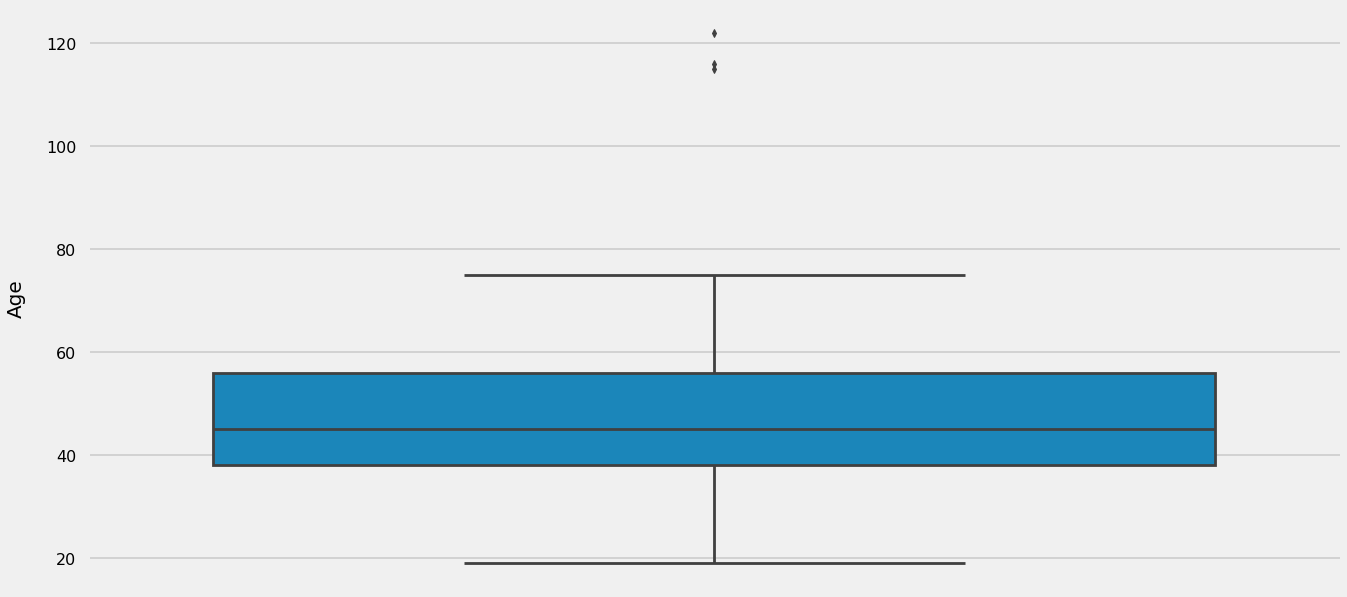

In [132]:
plt.figure(figsize=(20,10))
sns.boxplot(y=customer.Age);
plt.ylabel('Age', fontsize=20, labelpad=20);

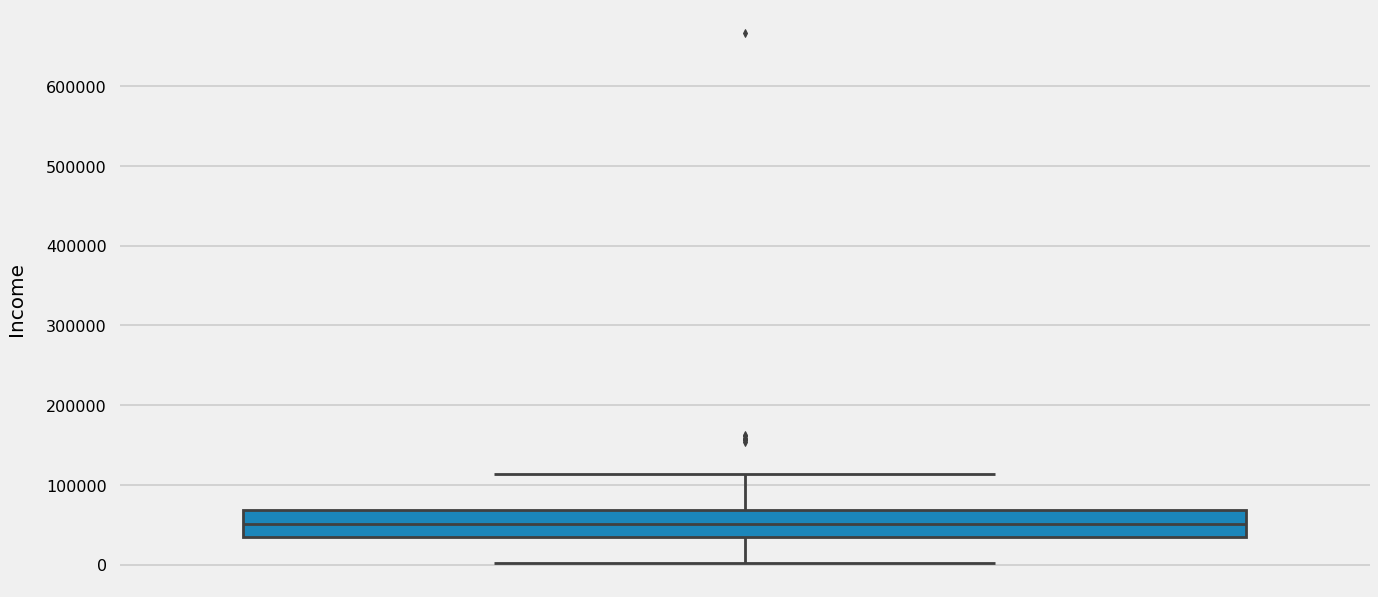

In [133]:
plt.figure(figsize=(20,10))
sns.boxplot(y=customer.Income);
plt.ylabel('Income', fontsize=20, labelpad=20);

***Insights:***

1. There are some customers aged above 100. This is unlikely to happen. Let's drop those customers from data
2. There are some customers who are earning more than 120,000 and some of them even more than 600,000. They are clearly the outliers in the data, so we will leave them out

In [134]:
customer = customer[customer.Age < 100]
customer = customer[customer.Income < 120000]


<h1 style="background-color:black
;font-family:newtimeroman;font-size:300%;text-align:left; color:#40E0D0">  2. Exploratory Data Analysis </h1><a id=0></a>

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Marital Status </h1><a id=0></a>

In [135]:
maritalstatus = customer.Marital_Status.value_counts()

fig = px.pie(maritalstatus, 
             values = maritalstatus.values, 
             names = maritalstatus.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

***Insights:*** 

2/3rd of the customers are living with partners while about 1/3rd are singles

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Average Spendings: Marital Status Wise </h1><a id=0></a>

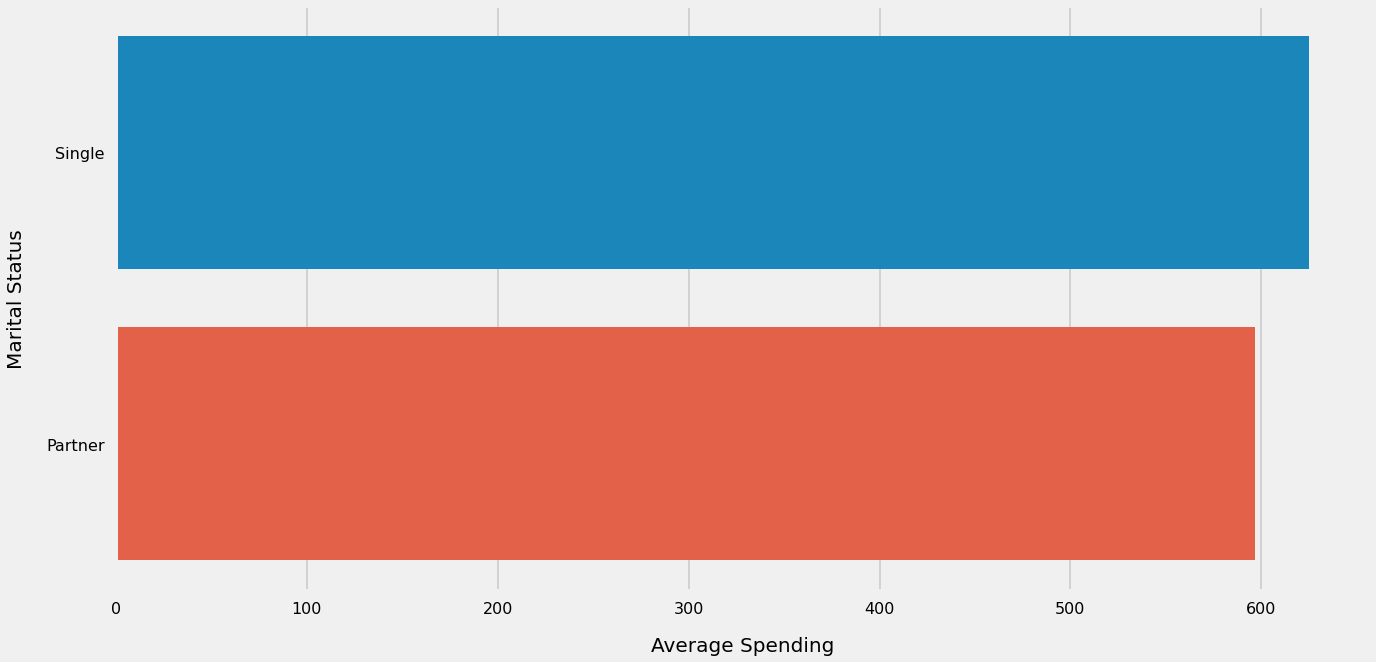

In [136]:
maritalspending = customer.groupby('Marital_Status')['TotalSpendings'].mean().sort_values(ascending=False)
maritalspending_df = pd.DataFrame(list(maritalspending.items()), columns=['Marital Status', 'Average Spending'])

plt.figure(figsize=(20,10))
sns.barplot(data = maritalspending_df, x="Average Spending", y="Marital Status");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Average Spending', fontsize=20, labelpad=20)
plt.ylabel('Marital Status', fontsize=20, labelpad=20);

***Insights:***

Despite being the minority, the Singles spent more money on the average as compared to the customers having partners

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Education Level </h1><a id=0></a>

In [137]:
education = customer.Education.value_counts()

fig = px.pie(education, 
             values = education.values, 
             names = education.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

***Insights:***

1. Half of the customers are University graduates
2. There are more customers who hold PhD degrees than the customers who did Masters

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Child Status </h1><a id=0></a>

In [138]:
children = customer.Children.value_counts()

fig = px.pie(children, 
             values = children.values, 
             names = children.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

***Insights:***

1. About 50% of the customers have only one child
2. 28% of the customers do-not have any children at home while 19% of them have 2 children

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Average Spendings: Child Status Wise </h1><a id=0></a>

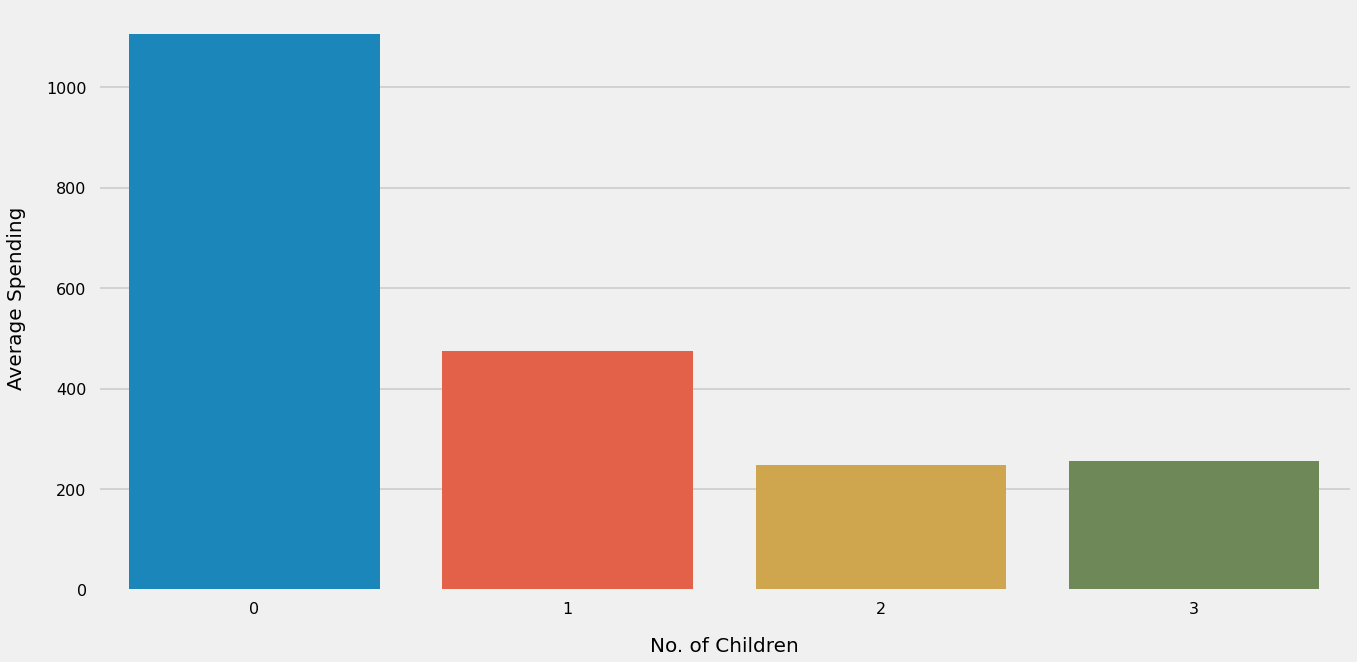

In [139]:
childrenspending = customer.groupby('Children')['TotalSpendings'].mean().sort_values(ascending=False)
childrenspending_df = pd.DataFrame(list(childrenspending.items()), columns=['No. of Children', 'Average Spending'])

plt.figure(figsize=(20,10))

sns.barplot(data=childrenspending_df,  x="No. of Children", y="Average Spending");
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Children', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

***Insights:***

1. Customers who don't have any children at home spent higher than the customers having 1 children
2. The customers having 1 children are spending higher than the customers havin 2 and 3 children

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Age Distribution of Customers </h1><a id=0></a>

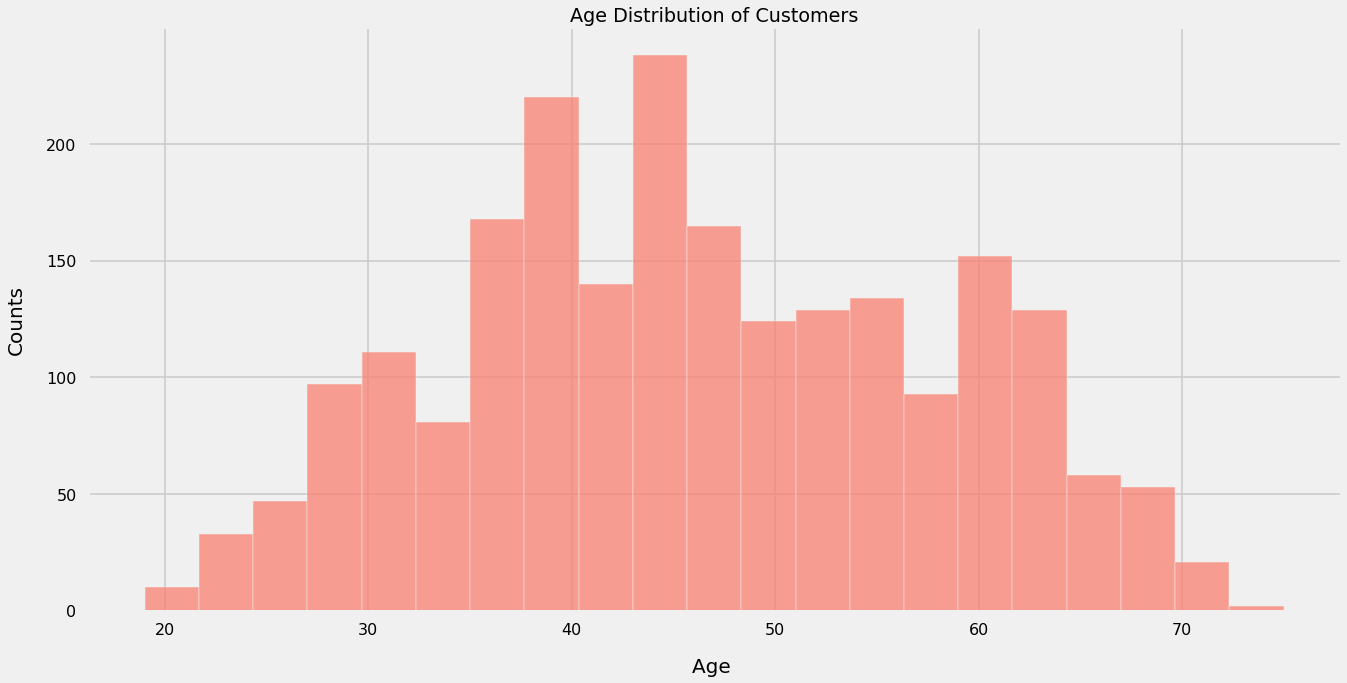

In [140]:
plt.figure(figsize=(20,10))
ax = sns.histplot(data = customer.Age, color='salmon')
ax.set(title = "Age Distribution of Customers");
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age ', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20);

***Insights:***

Age of the customers is nearly normally distributed, with most of the customers aged between 40 and 60

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Relationship: Age vs Spendings </h1><a id=0></a>

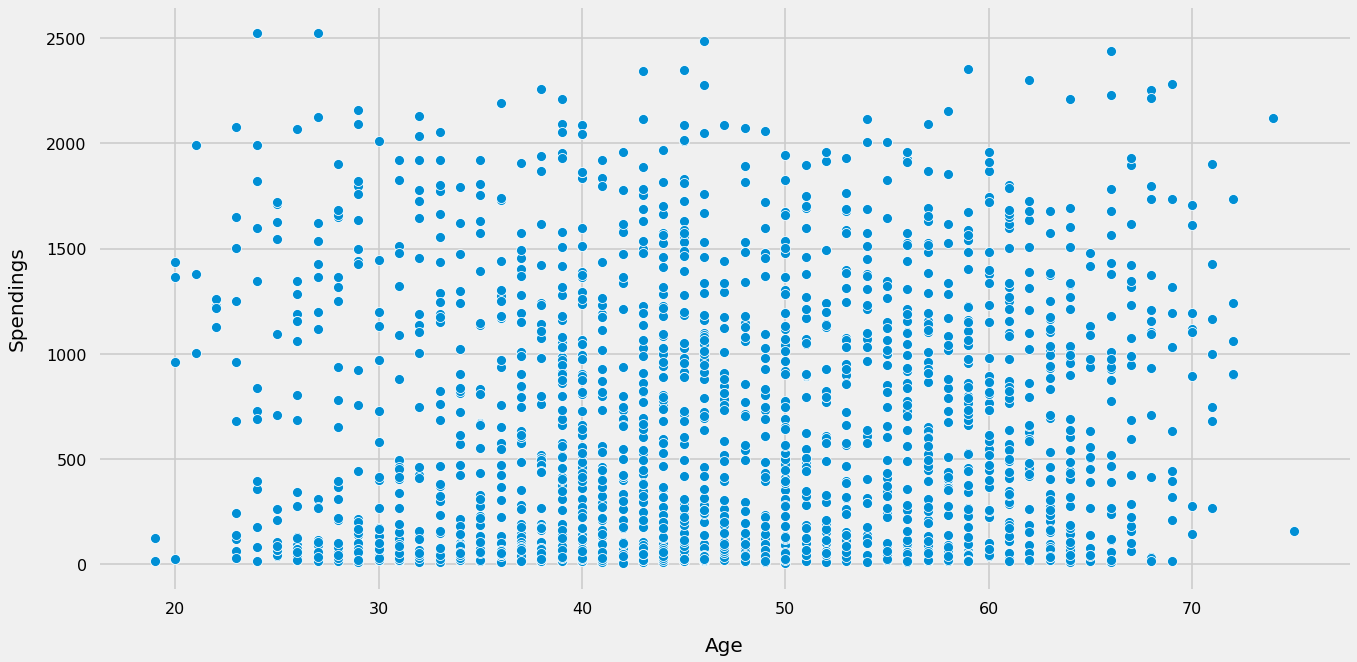

In [141]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=customer.Age, y=customer.TotalSpendings, s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);


***Insights:***

There doesn't seem to be any clear relationship between age of customers and their spending habits

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Customers Segmentation: Age Group Wise </h1><a id=0></a>

In [142]:
agegroup = customer.AgeGroup.value_counts()

fig = px.pie(labels = agegroup.index, values = agegroup.values, names = agegroup.index, width = 550, height = 550)

fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.75, 
                  marker = dict(colors = ['#3D0C02', '#800000'  , '#C11B17','#C0C0C0'], 
                                line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'Age Groups', 
                                      x = 0.5, y = 0.5, font_size = 36, showarrow = False,                                       
                                      font_color = 'black')],
                  showlegend = False)

fig.show()

***Insights:***

1. More than 50% of the customers are Middle Age Adults aged between 40 and 60
2. The 2nd famous age category is Adult, aged between 20 and 40

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Average Spendings: Age Group Wise </h1><a id=0></a>

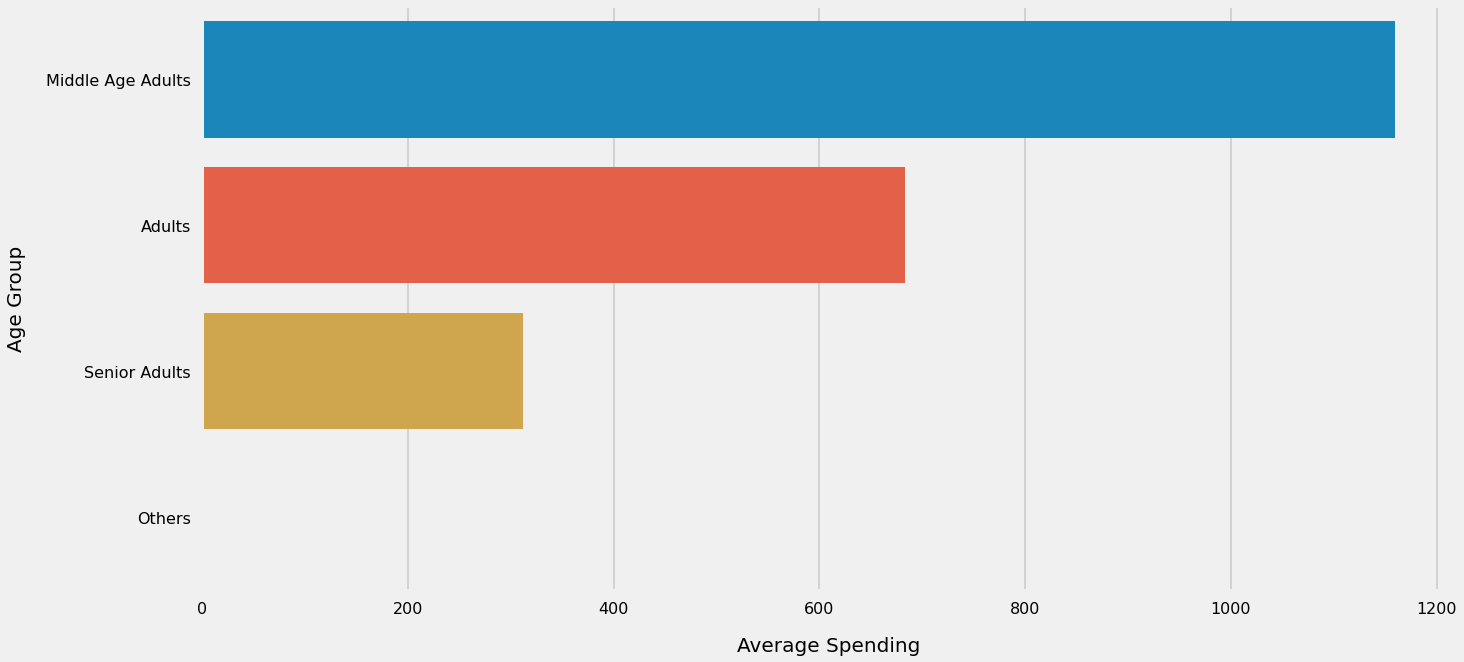

In [143]:
agegroupspending = customer.groupby('AgeGroup')['TotalSpendings'].mean().sort_values(ascending=False)
agegroupspending_df = pd.DataFrame(list(agegroup.items()), columns=['Age Group', 'Average Spending'])

plt.figure(figsize=(20,10))

sns.barplot(data = agegroupspending_df, x="Average Spending", y='Age Group');
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Average Spending', fontsize=20, labelpad=20)
plt.ylabel('Age Group', fontsize=20, labelpad=20);

***Insights:***

Middle age adults spent much more than the other age groups

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Income Distribution of Customers </h1><a id=0></a>

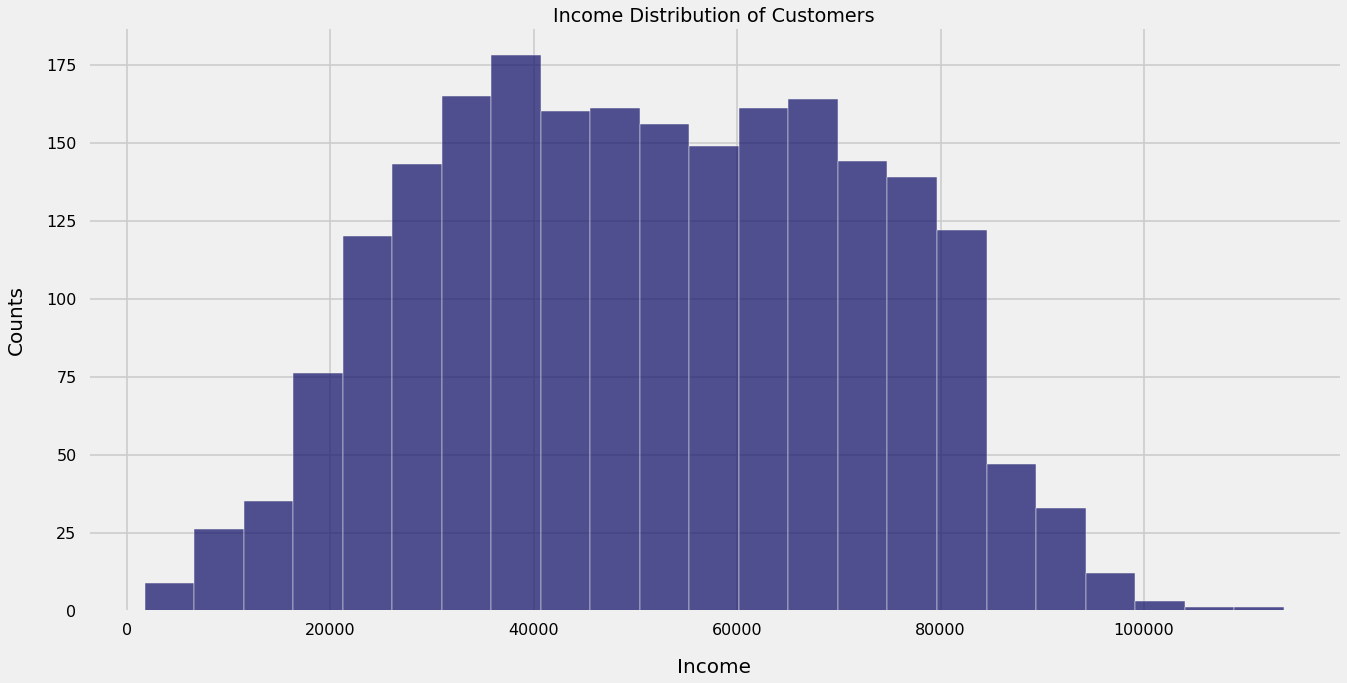

In [144]:
plt.figure(figsize=(20, 10))
ax = sns.histplot(data = customer.Income, color = "midnightblue")
ax.set(title = "Income Distribution of Customers");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20);

***Insights:***

The salaries of the customers have normal distribution with most of the customers earning between 25000 and 85000

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Relationship: Income vs Spendings </h1><a id=0></a>

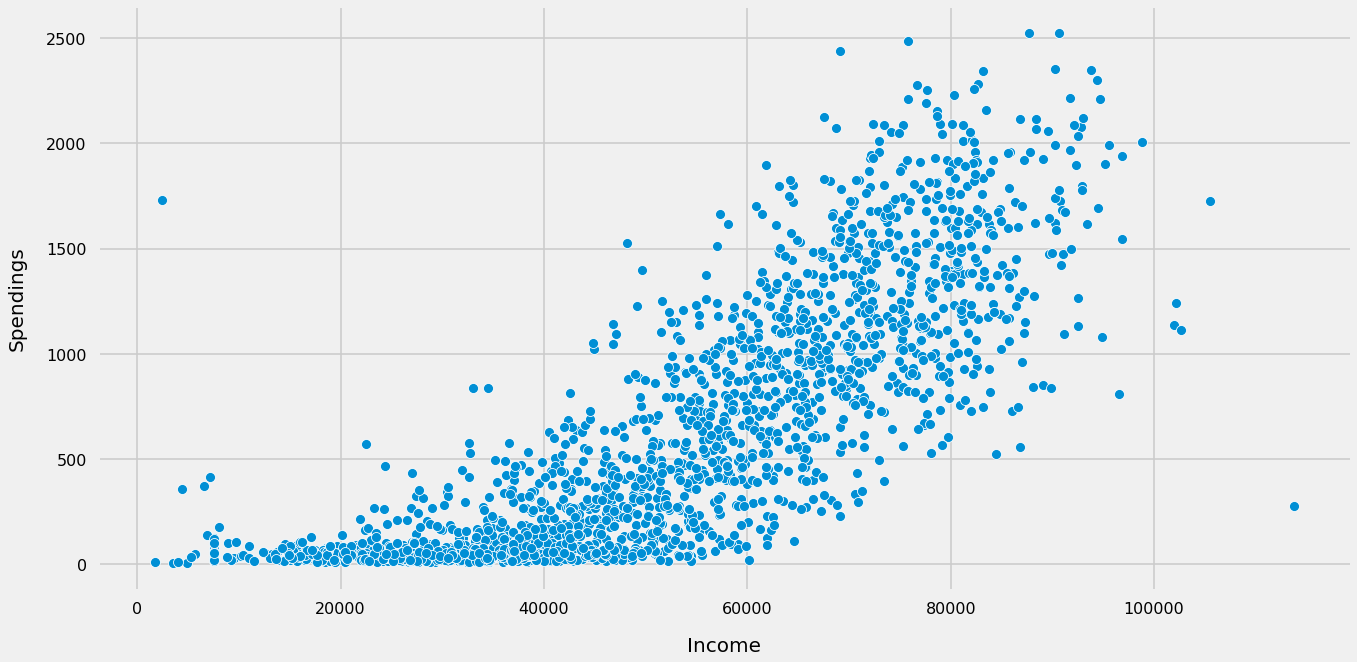

In [145]:
plt.figure(figsize=(20,10))


sns.scatterplot(x=customer.Income, y=customer.TotalSpendings, s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);



***Insights:***

The relationship is linear. Customers having higher salaries are spending more

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Most Bought Products </h1><a id=0></a>

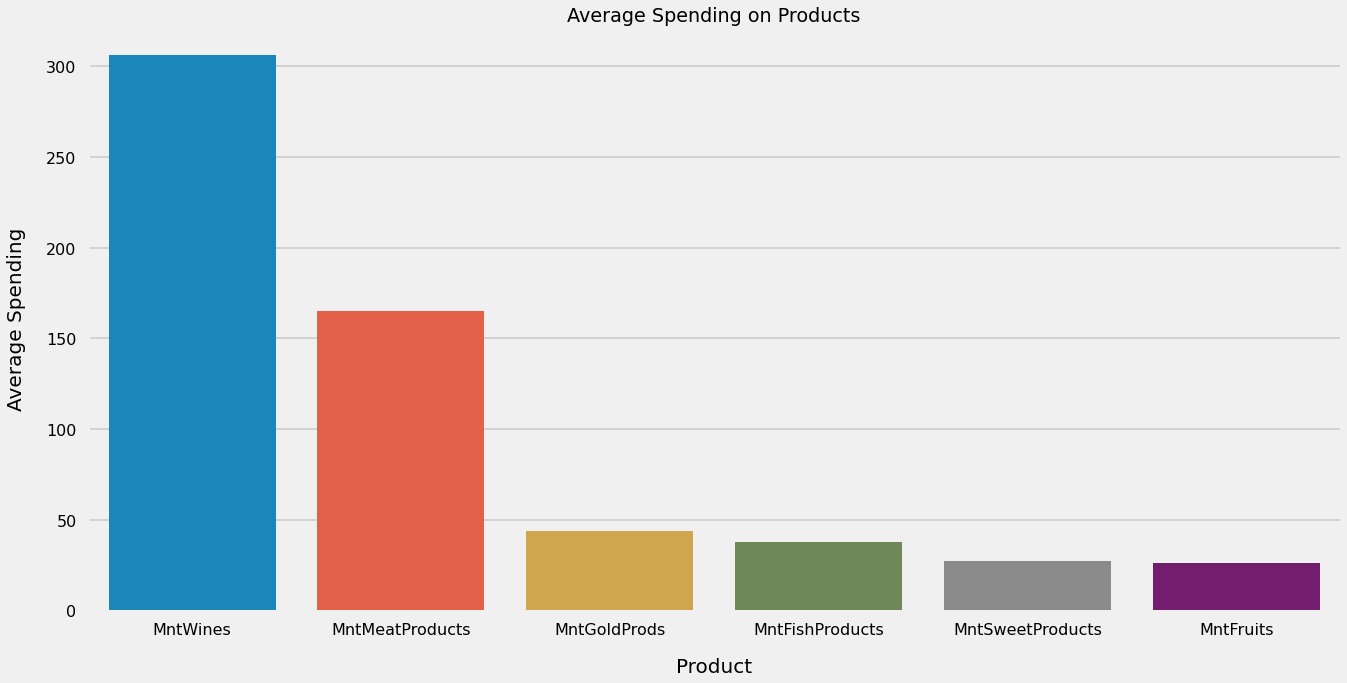

In [146]:
products = customer[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
product_means = products.mean(axis=0).sort_values(ascending=False)
product_means_df = pd.DataFrame(list(product_means.items()), columns=['Product', 'Average Spending'])

plt.figure(figsize=(20,10))
plt.title('Average Spending on Products')
sns.barplot(data=product_means_df, x='Product', y='Average Spending');
plt.xlabel('Product', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

***Insights:***

1. Wine and Meats products are the most famous products among the customers

2. Sweets and Fruits are not being purchased often

<h1 style="background-color:black
;font-family:newtimeroman;font-size:300%;text-align:left; color:#40E0D0">  3. Modelling Clusters </h1><a id=0></a>

Let's find out the different segmenst of the customers based on different features of the customers data using the K-Means Clusters. Let's first drop the unnecessary columns from the data.

In [147]:
X = customer.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits','MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Dt_Customer', 'Z_CostContact',
                          'Z_Revenue', 'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                          'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response', 'AgeGroup'], axis=1)

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Optimum Clusters Using Elbow Method </h1><a id=0></a>

Let's choose the optimum number of clusters based on the Elbow method

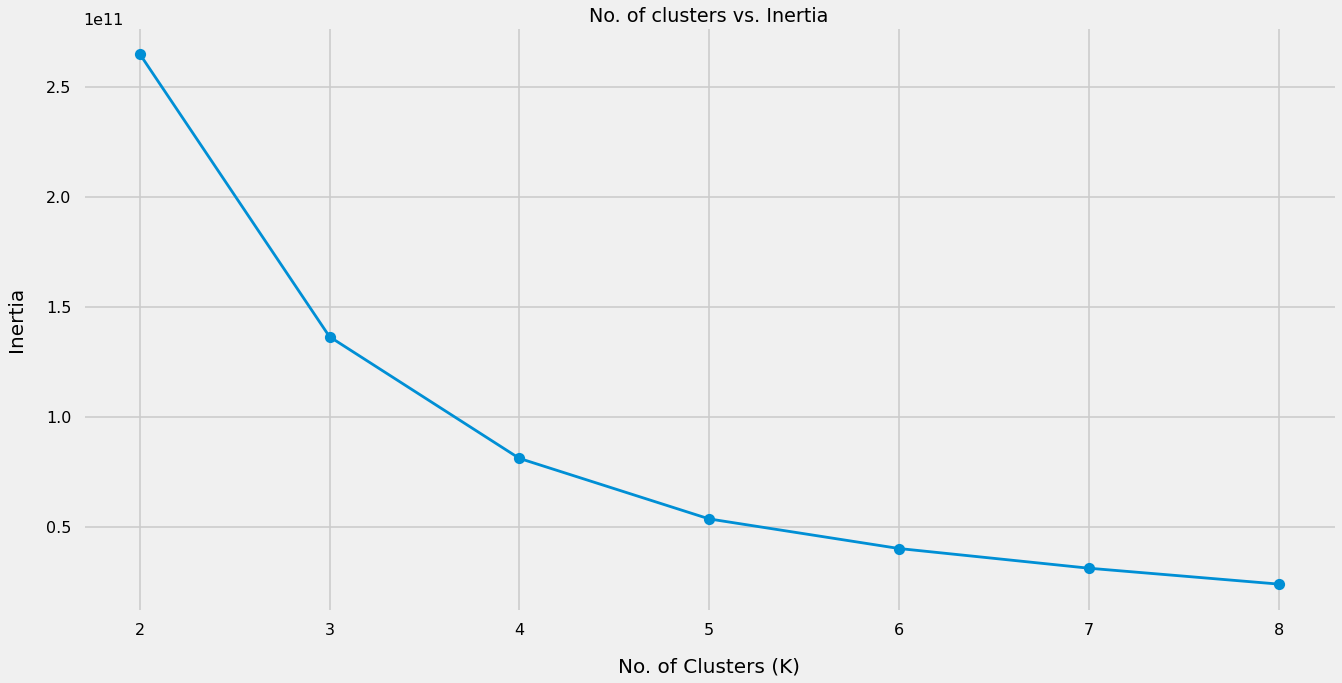

In [148]:
from sklearn.cluster import KMeans

options = range(2,9)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(20,10))    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Clusters (K)', fontsize=20, labelpad=20)
plt.ylabel('Inertia', fontsize=20, labelpad=20);

***Insights:***

Based on the above plot we will segment the customers into 4 clusters, as the inertia value donot decrase much after 4 clusters

In [149]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X)

preds = model.predict(X)

customer_kmeans = X.copy()
customer_kmeans['clusters'] = preds

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Clusters Identification </h1><a id=0></a>

Let's try to identify the modelled 4 clusters from different features of the data

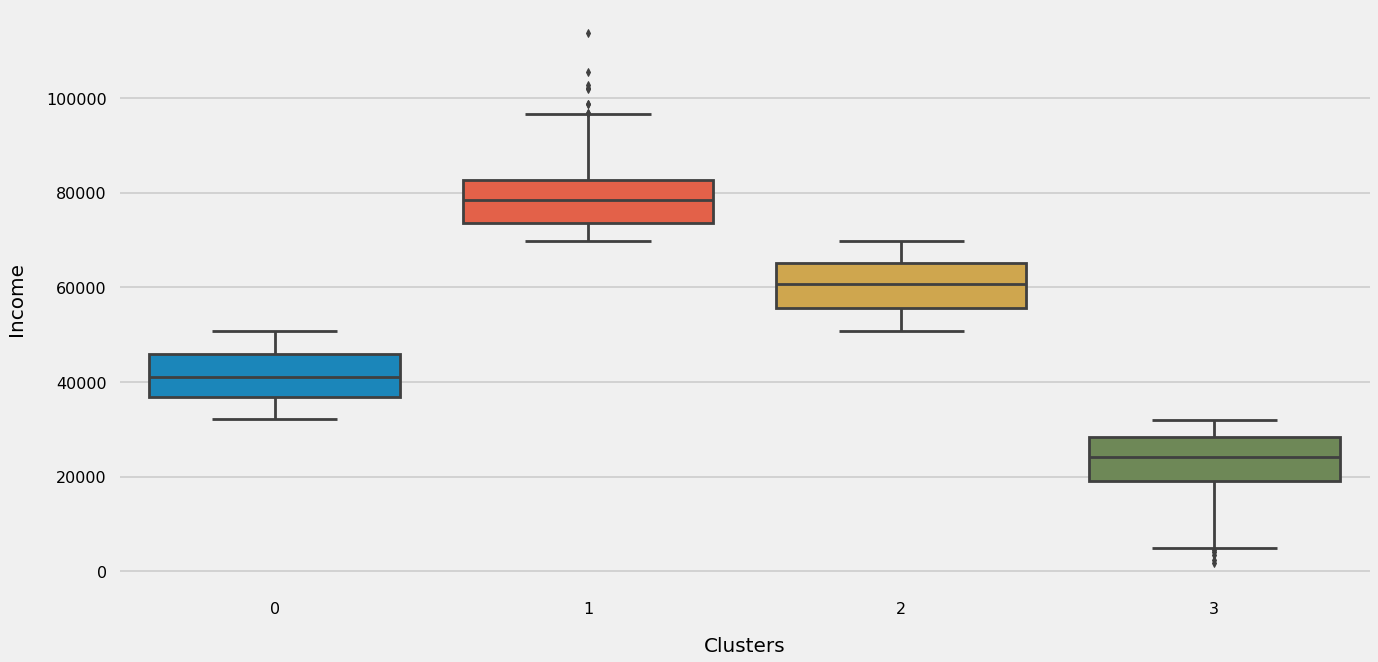

In [152]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Income');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=20, labelpad=20);

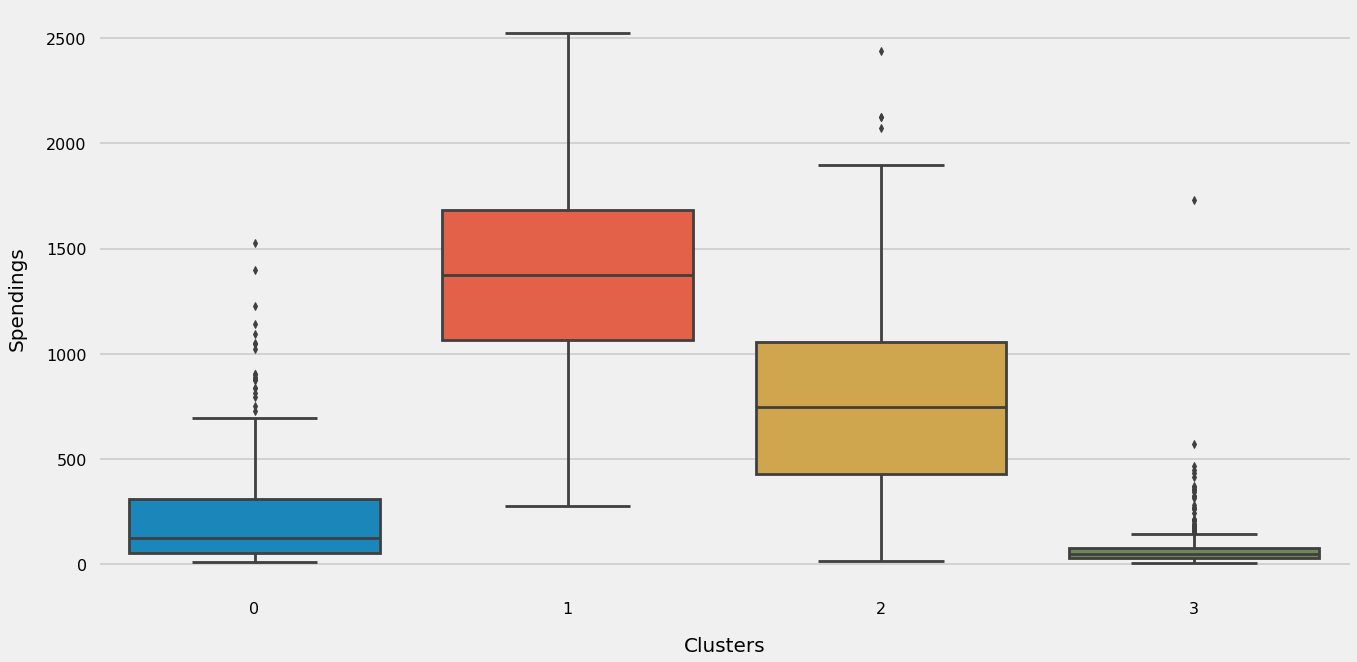

In [153]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'TotalSpendings');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

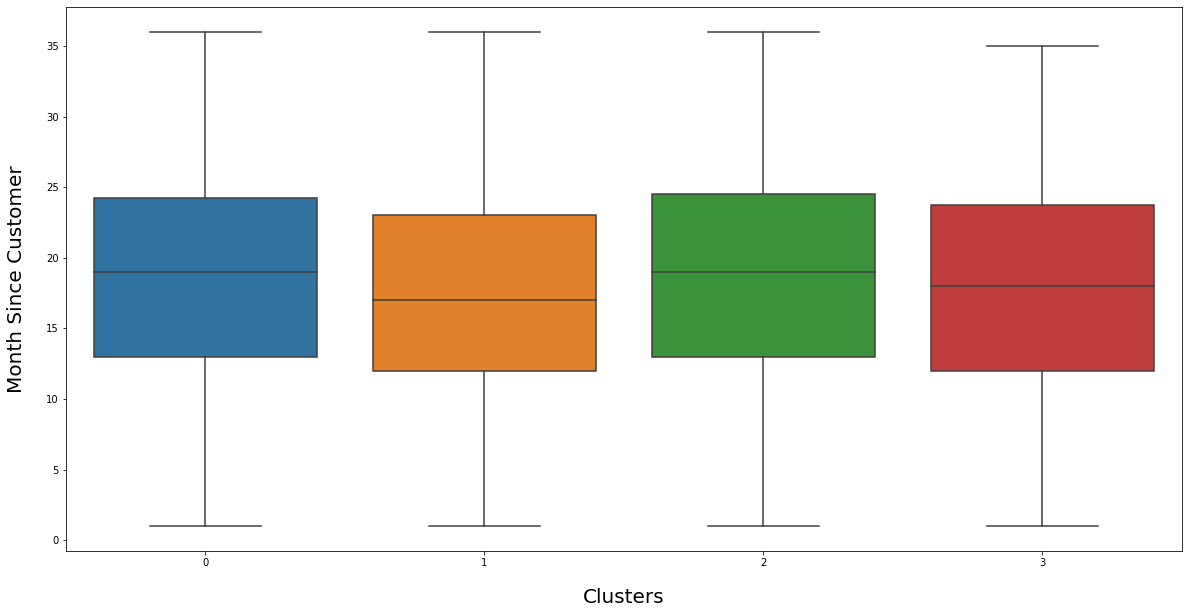

In [114]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Month_Customer');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Month Since Customer', fontsize=20, labelpad=20);

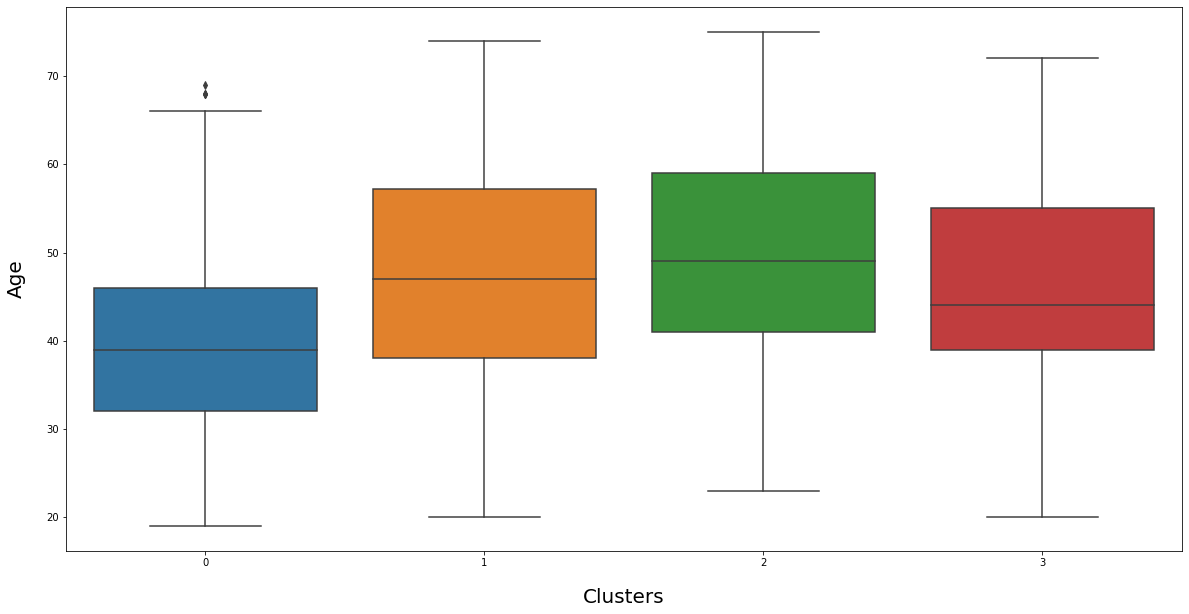

In [115]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Age');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Age', fontsize=20, labelpad=20);

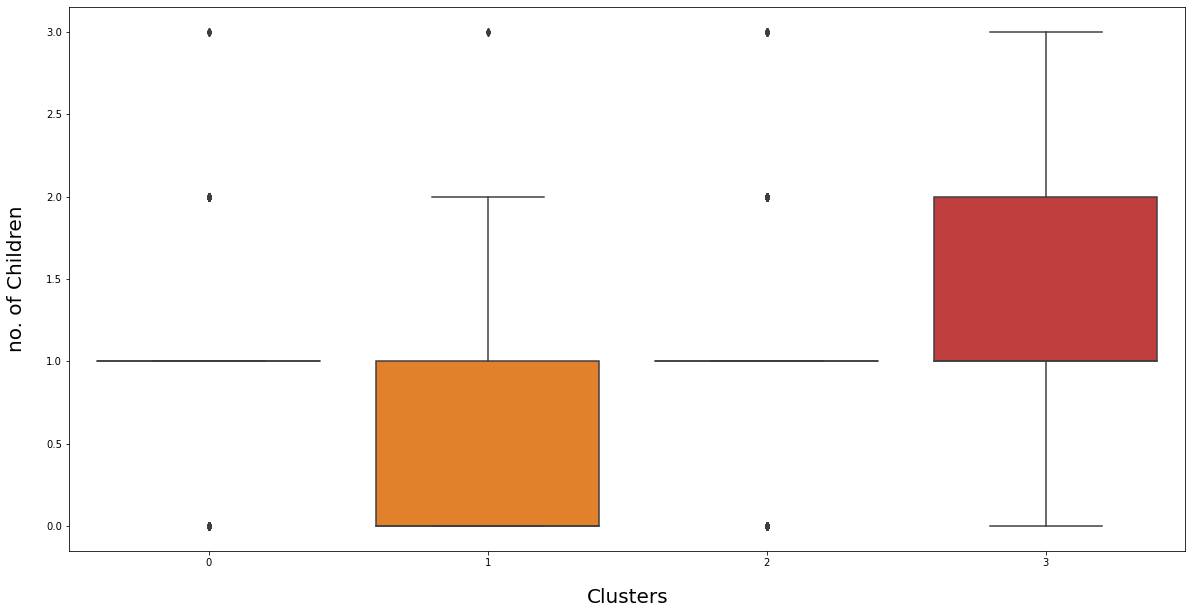

In [116]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Children');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('no. of Children', fontsize=20, labelpad=20);

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Clusters Interpretation </h1><a id=0></a>

From the above analysis we can segment the customers into 4 groups based on their income and total spendings:

***Platinum:***  The one's with highest earnings and highest spendings  

***Gold:*** The one's with high earnings and high spendings 

***Silver:*** The one's having low salary and less spendings

***Bronze:*** The one's having lowest salary and least spendings



<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Data Exploration: Clusters Based </h1><a id=0></a>

Let's explore the data again based on the modelled clusters to identify the spending habits of the customers

In [157]:
customer_kmeans.clusters = customer_kmeans.clusters.replace({1: 'Bronze',
                                                             2: 'Platinum',
                                                             3: 'Silver',
                                                             0: 'Gold'})

customer['clusters'] = customer_kmeans.clusters

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Customers Distribution </h1><a id=0></a>

In [184]:
cluster_counts = customer.clusters.value_counts()

fig = px.pie(cluster_counts, 
             values = cluster_counts.values, 
             names = cluster_counts.index)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.update_layout(showlegend = False)
fig.show()

***Insights:***

1. Most of the customers lie in the Silver and Gold categories, about 29% and 28% respectively
2. Platinum is the 3rd famous category of customers with 23% while only 20% occupy the bronze category

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Relationship: Income vs. Spendings </h1><a id=0></a>

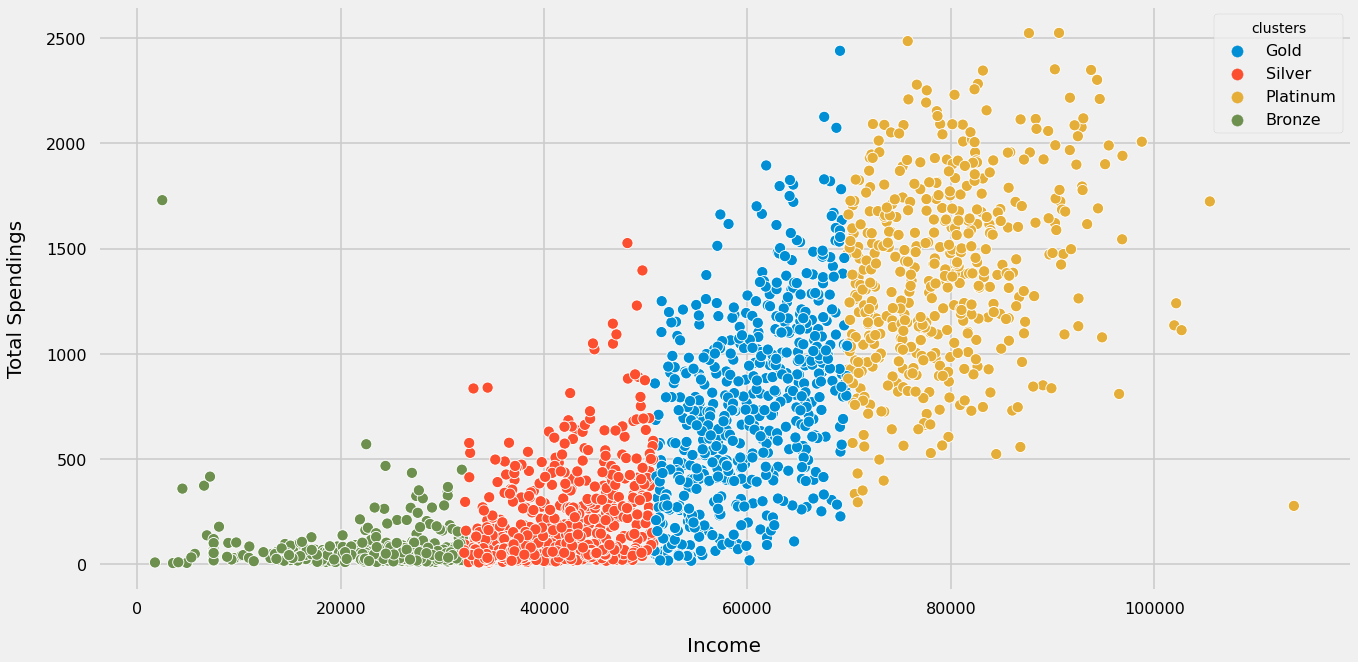

In [41]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=customer, x='Income', y='TotalSpendings', hue='clusters');
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Spendings', fontsize=20, labelpad=20);

***Insights:***

1. The 4 clusters can easily be identified from the above plot
2. Those earning more are also spending more

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Spending Habits by Clusters </h1><a id=0></a>

<Figure size 2160x1080 with 0 Axes>

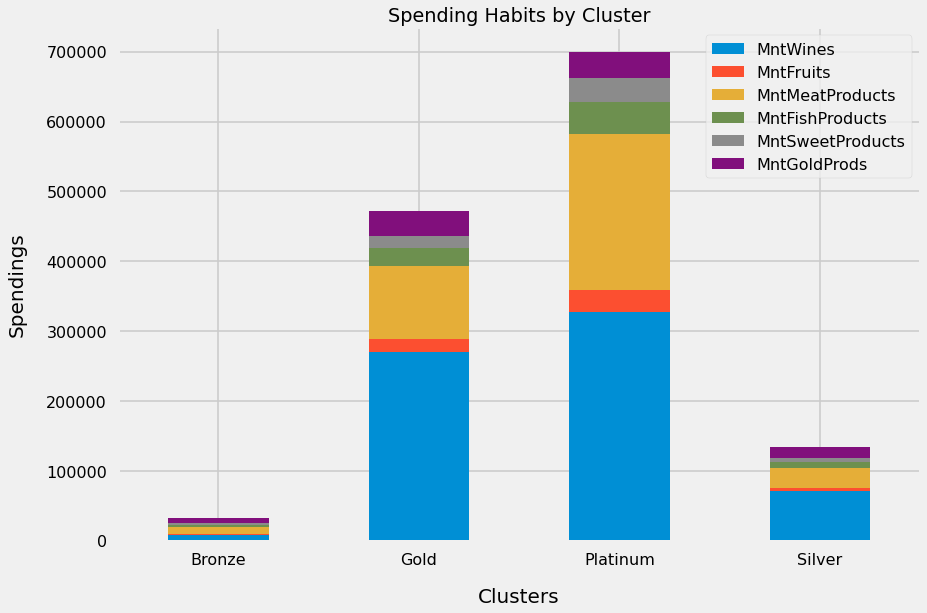

In [42]:
cluster_spendings = customer.groupby('clusters')[['MntWines', 'MntFruits','MntMeatProducts', 
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

plt.figure(figsize=(30,15))
cluster_spendings.plot(kind='bar', stacked=True)

plt.title('Spending Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

***Insights:***
Customers from all the segments have spent most of their money on Wine and Meat products

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Purchasing Habits by Clusters </h1><a id=0></a>

<Figure size 2160x1080 with 0 Axes>

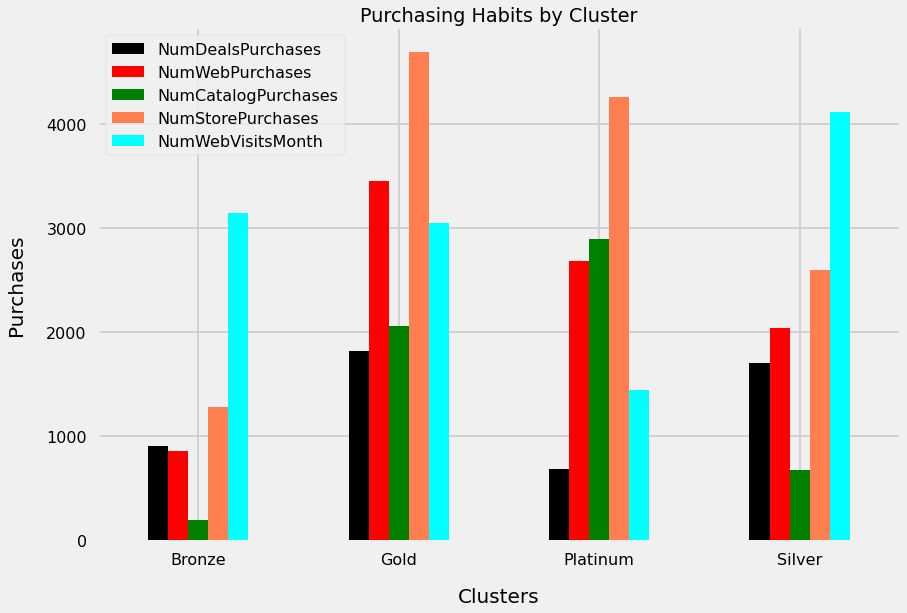

In [43]:
cluster_purchases = customer.groupby('clusters')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

plt.figure(figsize=(30,15))
cluster_purchases.plot(kind='bar', color=['black', 'red', 'green', 'coral', 'cyan'])

plt.title('Purchasing Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Purchases', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

***Insights:***

1. Platinum and Gold Customers mostly likely to do store purchasing
2. Most of the web and catalog purchases are also done by the customers from Platinum and Gold segments
3. Silver and Gold categoriesnalso like to buy from the stores
4. Deal purchases are common among the Gold and Silver customers
5. Silver category customers made the most number of web visits while customers from Platinum segment have least web visits

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Promotions Acceptance by Clusters </h1><a id=0></a>

<Figure size 2160x1080 with 0 Axes>

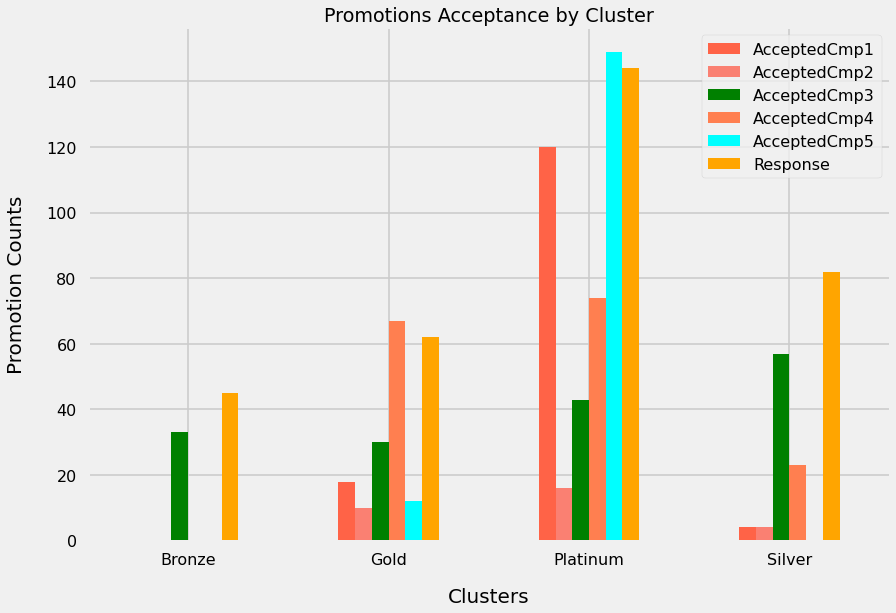

In [44]:
cluster_campaign = customer.groupby('clusters')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                                                  'AcceptedCmp5', 'Response']].sum()

plt.figure(figsize=(30,15))
cluster_campaign.plot(kind='bar', color=['tomato', 'salmon', 'green', 'coral', 'cyan', 'orange'])

plt.title('Promotions Acceptance by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Promotion Counts', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

***Insights:***

1. Platinum customers accepted the most of the offers from the comapany
2. Compaign 1, 5 and final one seems to be the most successful one's
3. Bronze category showed the least interest in the promotion campaings of the company

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Inferences and Conclusions </h1><a id=0></a>

1. Most of the customers are university graduates


2. Most of the customers are living with partners 


3. Those living alone have spent more than those living with partners


4. Most of the customers have only one child


5. Those having no children have spent more


6. Middle Age Adults, aged between 40 and 60, are famous age group category


7. Middle Age Adults are spending  on average, more than the other age groups


8. Most of the customers are earning between 25000 and 85000


9. Wine and Meat products are very famous among the customers


10. On the basis of income and total spendings, customers are divided into 4 clusters i.e. Platinum, Gold, Silver and Bronze


11. Most of the customers fall into the Silver and Gold categories


12. Those who are earning more are also spending more


13. Most of the customers like to buy from store and then online from the web


14. Platinum customers showed more acceptance towards promotion campaigns while bronze customers the least interest



<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Answering Basic Questions </h1><a id=0></a>


***1. What are the statistical characteristics of the customers?***

The company's customers are mostly married. There are more Middle Aged Adults, aged between 40 and 60 and most of them like to have one child. Most of the customers hold bachelor degree and their earnings are mostly between 25,000 and 85,000. 

***2. What are the spending habits of the customers?***

Customers have spent more on wine and meat products. Those without children have spent more than those having children. Singles are spending more than the one's with the partners. Middle aged adults have spent more than the other age groups. Store shopping is the preferred channel for purchasing among the customers. Web and Catalog purchasing also have potential

***3. Are there some products which need more marketing?***

Sweets and Fruits need some effective marketing. Company needs to run promotions for these products in order to increase the revenue from these products. Baskets of the least selling products combined with the most selling products can be effective. 

***4. How the marketing can be made effective?***

As a marketing recommendation give coupons to the old and high spending customers. Market the cheap and on-offer products to the low income and low spending customers. Web purchasing has some potential. To unlock this give special discounts to the customers who sign up on company's website 